In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire
%matplotlib inline

In [52]:
items = pd.read_csv('items.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')
df = sales.merge(stores,left_on='store',right_on='store_id',how='left')
df = df.merge(items,left_on='item',right_on='item_id',how='left')
df.drop(columns=['store_id','item_id'],inplace=True)
fmt = '%a, %d %b %Y %H:%M:%S %Z'
df.sale_date = pd.to_datetime(df.sale_date,format=fmt)


In [70]:
def get_stores_data():
    items = pd.read_csv('items.csv')
    sales = pd.read_csv('sales.csv')
    stores = pd.read_csv('stores.csv')
    df = sales.merge(stores,left_on='store',right_on='store_id',how='left')
    df = df.merge(items,left_on='item',right_on='item_id',how='left')
    df.drop(columns=['store_id','item_id'],inplace=True)
    df = sales.merge(stores,left_on='store',right_on='store_id',how='left')
    df = df.merge(items,left_on='item',right_on='item_id',how='left')
    df.drop(columns=['store_id','item_id'],inplace=True)
    fmt = '%a, %d %b %Y %H:%M:%S %Z'
    df.sale_date = pd.to_datetime(df.sale_date,format=fmt)
    df = df.set_index('sale_date')
    df['month'] = df.index.month
    df['weekday'] = df.index.weekday
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [71]:
def sales_by_day(df):
    sales_by_day = df.resample('D')[['sales_total']].sum()
    sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()
    return sales_by_day

In [53]:
df = sales.merge(stores,left_on='store',right_on='store_id',how='left')
df = df.merge(items,left_on='item',right_on='item_id',how='left')
df.drop(columns=['store_id','item_id'],inplace=True)

In [54]:
df.head(3)

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [60]:
fmt = '%a, %d %b %Y %H:%M:%S %Z'
df.sale_date = pd.to_datetime(df.sale_date,format=fmt)

In [61]:
df.sale_date = pd.to_datetime(df.sale_date)

In [62]:
df = df.set_index('sale_date')

In [63]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


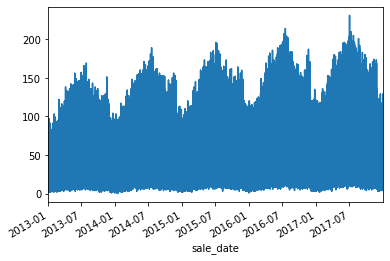

In [36]:
plt

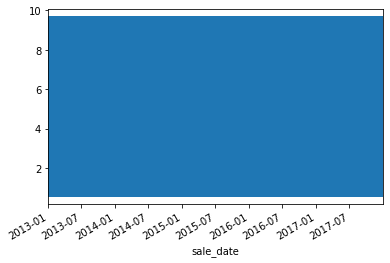

In [37]:
df['item_price'].plot()
plt.show()

In [41]:
df['month'] = df.index.month

In [44]:
df['weekday'] = df.index.weekday

In [48]:
df.head(2)

,item,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,2


In [66]:
df['sales_total'] = df.sale_amount * df.item_price

In [67]:
sales_by_day = df.resample('D')[['sales_total']].sum()
sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()

In [68]:
sales_by_day['diff_with_last_day'] = sales_by_day.sales_total.diff()

In [69]:
sales_by_day

,sales_total,diff_with_last_day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12
2013-01-06 00:00:00+00:00,93093.85,5472.00
2013-01-07 00:00:00+00:00,63777.54,-29316.31
2013-01-08 00:00:00+00:00,72994.66,9217.12
2013-01-09 00:00:00+00:00,75133.92,2139.26
